In [46]:
import numpy as np
#from scipy.integrate import quad
import math
import matplotlib.pyplot as plt

In [181]:
#def evidence_binomial(pa, Fa, Fb):
#    return pa**Fa * (1-pa)**Fb

def likelihood_binomial(pa, Fa, Fb):
    return pa**Fa * (1-pa)**Fb

def evidence_binomial(Fa, Fb):
    return math.factorial(Fa)*math.factorial(Fb)/math.factorial(Fa+Fb+1)

def posterior_binomial(pa, Fa, Fb, prior=1):
    likelihood = likelihood_binomial(pa, Fa, Fb)
    evidence = evidence_binomial(Fa, Fb)

    posterior =  likelihood * prior / evidence
    return posterior

def expected_value(x, y):
    avg = 0
    for idx in range(x.shape[0]):
        avg += y[idx] * x[idx]
    return avg

def calculate(Fa, Fb, N=1000):
    x = np.linspace(0,1, N)
    y = likelihood_binomial(x, Fa, Fb)/evidence_binomial(Fa,Fb)
    plt.plot(x,y)
    plt.show()
    
    print("Soma das posteriores: %.2f" % (y.sum()/x.shape[0]))

    avg = expected_value(x,y)/(x.shape[0])
    print("Pa médio: %.2f" % avg)

    mle = np.argmax(y)/x.shape[0]
    print("Pa MLE: %.2f" % mle)
    
    posterior = posterior_binomial(mle, Fa, Fb)
    print("Posterior: %.2f" % (posterior))

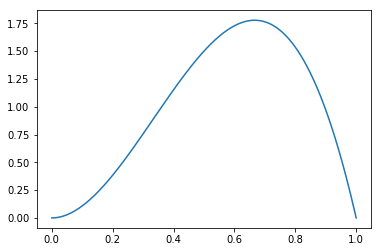

Soma das posteriores: 1.00
Pa médio: 0.60
Pa MLE: 0.67
Posterior: 1.78


In [185]:
Fa = 2
Fb = 1
calculate(Fa, Fb,1000)

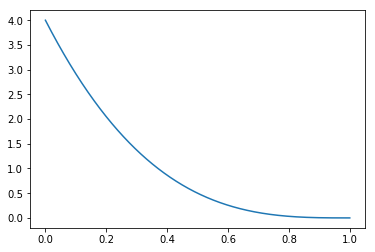

Soma das posteriores: 1.00
Pa médio: 0.20
Pa MLE: 0.00
Posterior: 4.00


In [183]:
Fa = 0
Fb = 3
calculate(Fa, Fb)